In [59]:
#From CoinMarketCap.com documentation

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [6]:
type(data)

dict

In [9]:
import pandas as pd
pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)

In [60]:
#This normalizes the data and makes it all pretty in a dataframe

df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\1295293969.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19370443.00000,19370443.00000,False,NaN,1,NaN,NaN,None,2023-05-11T18:04:00.000Z,26908.94505,18109927318.56131,-0.30410,-0.75701,-2.10201,-6.75464,-10.95913,27.77653,23.96150,521238186188.37201,46.94720,565087845949.41003,None,2023-05-11T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 18:06:18.296716
1,1027,Ethereum,ETH,ethereum,6862,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120309683.35371,120309683.35371,False,NaN,2,NaN,NaN,None,2023-05-11T18:04:00.000Z,1784.01622,9087118285.96162,5.46050,-1.01156,-2.44210,-5.23147,-6.46914,16.23442,16.91711,214634426099.91382,19.32440,214634426099.91000,None,2023-05-11T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 18:06:18.296716
2,825,Tether,USDT,tether,53212,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82612464846.62816,86090638895.78914,False,NaN,3,NaN,NaN,None,2023-05-11T18:04:00.000Z,1.00059,27974788456.63674,-1.85250,0.04822,-0.01217,0.02163,-0.01710,-1.11216,0.04147,82661340650.43413,7.44520,86141572482.92000,None,2023-05-11T18:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-11 18:06:18.296716
3,1839,BNB,BNB,bnb,1353,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860456.63776,155860456.63776,False,NaN,4,NaN,NaN,None,2023-05-11T18:04:00.000Z,305.84356,498854574.64075,-4.01940,-0.73670,-1.97647,-5.77005,-6.40752,8.27940,-0.39004,47668917084.70432,4.29180,47668917084.70000,None,2023-05-11T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 18:06:18.296716
4,3408,USD Coin,USDC,usd-coin,12360,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29993285937.20110,29993285937.20110,False,NaN,5,NaN,NaN,None,2023-05-11T18:04:00.000Z,1.00001,4186145048.13955,8.01470,0.04318,0.01151,0.00068,0.02750,3.58233,-0.01261,29993725303.96984,2.70050,29993725303.97000,None,2023-05-11T18:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-11 18:06:18.296716
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-11T18:04:00.000Z,0.41432,929979743.18118,-9.52550,-1.10169,-1.90765,-9.58332,-19.60339,14.47873,8.83615,21477568709.09332,1.93370,41432237119.27000,None,2023-05-11T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 18:06:18.296716
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841792186.80200,35777697010.94400,False,NaN,7,NaN,NaN,None,2023-05-11T18:04:00.000Z,0.35261,271608225.90180,-7.75810,-0.62642,-3.37974,-9.18304,-12.17723,11.45616,-2.31064,12285701139.10090,1.10660,15867626679.35000,None,2023-05-11T18:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-11 18:06:18.296716
7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139303356383.70523,139303356383.70523,False,NaN,8,NaN,NaN,None,2023-05-11T18:04:00.000Z,0.06995,316676085.08845,6.26990,-1.40950,-2.87516,-10.70812,-17.38992,2.97937,-14.14996,9744141978.75668,0.87730,9744141978.76000,None,2023-05-11T18:04:00.

In [61]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2= pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv'):
        df.to_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv', mode='a', header = False)

In [62]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed succesfully')
    sleep(60) #sleep for 01 minute
exit()

C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\185760146.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed succesfully


C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\185760146.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed succesfully


C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\185760146.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed succesfully


C:\Users\Ogros\AppData\Local\Temp\ipykernel_9832\185760146.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed succesfully


Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x000002504618B5B0>
Traceback (most recent call last):
  File "C:\Users\Ogros\anaconda3\lib\weakref.py", line 57, in _cb
    self = self_wr()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [63]:
df72 = pd.read_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19369275.00000,19369275.00000,False,NaN,1,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,28166.15452,15398447186.60688,-4.92950,0.24127,2.71847,-0.54817,-1.03010,39.05262,24.52887,545557992591.08752,47.11810,591489244920.77002,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
1,1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1873.73230,7109435784.27899,-5.90000,0.09611,1.79229,1.06268,0.60345,29.91312,14.77717,225443162147.48639,19.46880,225443162147.48999,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
2,2,825,Tether,USDT,tether,53102,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82491900635.54085,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00053,24369090943.58615,-9.75660,-0.00734,-0.01358,0.01051,-0.01221,-0.80077,0.04214,82535900306.28520,7.12760,86136558068.11000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 16:01:36.606195
3,3,1839,BNB,BNB,bnb,1350,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860702.54839,155860702.54839,False,NaN,4,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,315.07883,481156691.57641,-4.87430,0.04846,0.77460,-2.44363,0.87873,14.65047,-1.21759,49108407464.34603,4.24090,49108407464.35000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
4,4,3408,USD Coin,USDC,usd-coin,12321,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30084042218.53992,30084042218.53992,False,NaN,5,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00004,3334462342.77810,-6.08950,-0.01069,-0.00393,-0.00676,0.00932,8.60537,0.00688,30085192168.82334,2.59810,30085192168.82000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 16:01:36.606195
5,5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.43019,901856169.15924,-20.30730,-0.03674,1.73608,-5.08846,-14.79549,18.05346,6.94594,22300048568.66686,1.92580,43018877629.15000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
6,6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34841944878.31800,35761344982.35800,False,NaN,7,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.37022,236478685.81947,-11.63280,0.39671,2.36454,-2.87949,-4.84093,20.70762,-4.25056,12899166473.09592,1.11390,16659876287.52000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
7,7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139288606383.70526,139288606383.70526,False,NaN,8,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.07400,242396497.12847,-38.78160,0.13012,1.85295,-4.81077,-11.06062,14.50022,-16.07693,10307857495.60428,0.89020,10307857495.60000,NaN,2023-05-10T16

In [64]:
#Fixing the format
pd.set_option ('display.float_format', lambda x: '%.5f' % x)

In [65]:
df72 = pd.read_csv(r'C:\Users\Ogros\Desktop\Alex Bootcamp\Python\API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10207,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19369275.00000,19369275.00000,False,NaN,1,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,28166.15452,15398447186.60688,-4.92950,0.24127,2.71847,-0.54817,-1.03010,39.05262,24.52887,545557992591.08752,47.11810,591489244920.77002,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
1,1,1027,Ethereum,ETH,ethereum,6858,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120317700.84569,120317700.84569,False,NaN,2,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1873.73230,7109435784.27899,-5.90000,0.09611,1.79229,1.06268,0.60345,29.91312,14.77717,225443162147.48639,19.46880,225443162147.48999,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
2,2,825,Tether,USDT,tether,53102,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82491900635.54085,86090638896.21469,False,NaN,3,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00053,24369090943.58615,-9.75660,-0.00734,-0.01358,0.01051,-0.01221,-0.80077,0.04214,82535900306.28520,7.12760,86136558068.11000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-10 16:01:36.606195
3,3,1839,BNB,BNB,bnb,1350,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155860702.54839,155860702.54839,False,NaN,4,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,315.07883,481156691.57641,-4.87430,0.04846,0.77460,-2.44363,0.87873,14.65047,-1.21759,49108407464.34603,4.24090,49108407464.35000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
4,4,3408,USD Coin,USDC,usd-coin,12321,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30084042218.53992,30084042218.53992,False,NaN,5,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,1.00004,3334462342.77810,-6.08950,-0.01069,-0.00393,-0.00676,0.00932,8.60537,0.00688,30085192168.82334,2.59810,30085192168.82000,NaN,2023-05-10T16:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-10 16:01:36.606195
5,5,52,XRP,XRP,xrp,942,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.43019,901856169.15924,-20.30730,-0.03674,1.73608,-5.08846,-14.79549,18.05346,6.94594,22300048568.66686,1.92580,43018877629.15000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
6,6,2010,Cardano,ADA,cardano,782,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34841944878.31800,35761344982.35800,False,NaN,7,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.37022,236478685.81947,-11.63280,0.39671,2.36454,-2.87949,-4.84093,20.70762,-4.25056,12899166473.09592,1.11390,16659876287.52000,NaN,2023-05-10T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-10 16:01:36.606195
7,7,74,Dogecoin,DOGE,dogecoin,703,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139288606383.70526,139288606383.70526,False,NaN,8,NaN,NaN,NaN,2023-05-10T16:00:00.000Z,0.07400,242396497.12847,-38.78160,0.13012,1.85295,-4.81077,-11.06062,14.50022,-16.07693,10307857495.60428,0.89020,10307857495.60000,NaN,2023-05-10T16

In [66]:
#Group Crypto Currencies
df3= df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.75701,-2.10201,-6.75464,-10.95913,27.77653,23.96150
Ethereum,-1.01156,-2.44210,-5.23147,-6.46914,16.23442,16.91711
Tether,0.04822,-0.01217,0.02163,-0.01710,-1.11216,0.04147
BNB,-0.73670,-1.97647,-5.77005,-6.40752,8.27940,-0.39004
USD Coin,0.04318,0.01151,0.00068,0.02750,3.58233,-0.01261
XRP,-1.10169,-1.90765,-9.58332,-19.60339,14.47873,8.83615
Cardano,-0.62642,-3.37974,-9.18304,-12.17723,11.45616,-2.31064
Dogecoin,-1.40950,-2.87516,-10.70812,-17.38992,2.97937,-14.14996
Solana,-0.68219,-3.51669,-8.19532,-14.12909,6.30276,-3.78261


In [67]:
df4= df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.75701
             quote.USD.percent_change_24h    -2.10201
             quote.USD.percent_change_7d     -6.75464
             quote.USD.percent_change_30d   -10.95913
             quote.USD.percent_change_60d    27.77653
             quote.USD.percent_change_90d    23.96150
Ethereum     quote.USD.percent_change_1h     -1.01156
             quote.USD.percent_change_24h    -2.44210
             quote.USD.percent_change_7d     -5.23147
             quote.USD.percent_change_30d    -6.46914
             quote.USD.percent_change_60d    16.23442
             quote.USD.percent_change_90d    16.91711
Tether       quote.USD.percent_change_1h      0.04822
             quote.USD.percent_change_24h    -0.01217
             quote.USD.percent_change_7d      0.02163
             quote.USD.percent_change_30d    -0.01710
             quote.USD.percent_change_60d    -1.11216
             quote.USD.percent_change_90

In [68]:
type(df4)

pandas.core.series.Series

In [69]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.75701
            quote.USD.percent_change_24h  -2.10201
            quote.USD.percent_change_7d   -6.75464
            quote.USD.percent_change_30d -10.95913
            quote.USD.percent_change_60d  27.77653
            quote.USD.percent_change_90d  23.96150
Ethereum    quote.USD.percent_change_1h   -1.01156
            quote.USD.percent_change_24h  -2.44210
            quote.USD.percent_change_7d   -5.23147
            quote.USD.percent_change_30d  -6.46914
            quote.USD.percent_change_60d  16.23442
            quote.USD.percent_change_90d  16.91711
Tether      quote.USD.percent_change_1h    0.04822
            quote.USD.percent_change_24h  -0.01217
            quote.USD.percent_change_7d    0.02163
            quote.USD.percent_change_30d  -0.01710
            quote.USD.percent_change_60d  -1.11216
            quote.USD.percent_change_90d   0.04147
BNB         quote.USD.percent_change_1h   -0.73670
            quote.USD.percent_change_24h  -1.97647
            quote.USD.percent_change_7d   -5.77005
            quote.USD.percent_change_30d  -6.40752
            quote.USD.percent_change_60d   8.27940
            quote.USD.percent_change_90d  -0.39004
USD Coin    quote.USD.percent_change_1h    0.04318
            quote.USD.percent_change_24h   0.01151
            quote.USD.percent_change_7d    0.00068
            quote.USD.percent_change_30d   0.02750
            quote.USD.percent_change_60d   3.58233
            quote.USD.percent_change_90d  -0.01261
XRP         quote.USD.percent_change_1h   -1.10169
            quote.USD.percent_change_24h  -1.90765
            quote.USD.percent_change_7d   -9.58332
            quote.USD.percent_change_30d -19.60339
            quote.USD.percent_change_60d  14.47873
            quote.USD.percent_change_90d   8.83615
Cardano     quote.USD.percent_change_1h   -0.62642
            quote.USD.percent_change_24h  -3.37974
            quote.USD.percent_change_7d   -9.18304
            quote.USD.percent_change_30d -12.17723
            quote.USD.percent_change_60d  11.45616
            quote.USD.percent_change_90d  -2.31064
Dogecoin    quote.USD.percent_change_1h   -1.40950
            quote.USD.percent_change_24h  -2.87516
            quote.USD.percent_change_7d  -10.70812
            quote.USD.percent_change_30d -17.38992
            quote.USD.percent_change_60d   2.97937
            quote.USD.percent_change_90d -14.14996
Solana      quote.USD.percent_change_1h   -0.68219
            quote.USD.percent_change_24h  -3.51669
            quote.USD.percent_change_7d   -8.19532
            quote.USD.percent_change_30d -14.12909
            quote.USD.percent_change_60d   6.30276
            quote.USD.percent_change_90d  -3.78261
Polygon     quote.USD.percent_change_1h   -0.89611
            quote.USD.percent_change_24h  -2.85072
            quote.USD.percent_change_7d  -14.85955
            quote.USD.percent_change_30d -25.19893
            quote.USD.percent_change_60d -24.55416
            quote.USD.percent_change_90d -34.51264
Polkadot    quote.USD.percent_change_1h   -1.21909
            quote.USD.percent_change_24h  -2.55073
            quote.USD.percent_change_7d   -7.97004
            quote.USD.percent_change_30d -19.07778
            quote.USD.percent_change_60d  -7.68921
            quote.USD.percent_change_90d -15.86270
TRON        quote.USD.percent_change_1h   -0.74786
            quote.USD.percent_change_24h  -2.05288
            quote.USD.percent_change_7d   -2.05408
            quote.USD.percent_change_30d   1.72891
            quote.USD.percent_change_60d  11.13168
            quote.USD.percent_change_90d   6.76820
Litecoin    quote.USD.percent_change_1h   -1.70097
            quote.USD.percent_change_24h  -0.39929
            quote.USD.percent_change_7d  -10.13946
            quote.USD.percent_change_30d -16.54351
            quote.USD.percent_change_60d  11.09177
            quo

In [70]:
df5.count()

values    90
dtype: int64

In [71]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.75701
1,Bitcoin,quote.USD.percent_change_24h,-2.10201
2,Bitcoin,quote.USD.percent_change_7d,-6.75464
3,Bitcoin,quote.USD.percent_change_30d,-10.95913
4,Bitcoin,quote.USD.percent_change_60d,27.77653
5,Bitcoin,quote.USD.percent_change_90d,23.96150
6,Ethereum,quote.USD.percent_change_1h,-1.01156
7,Ethereum,quote.USD.percent_change_24h,-2.44210
8,Ethereum,quote.USD.percent_change_7d,-5.23147
9,Ethereum,quote.USD.percent_change_30d,-6.46914


In [72]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.75701
1,Bitcoin,quote.USD.percent_change_24h,-2.10201
2,Bitcoin,quote.USD.percent_change_7d,-6.75464
3,Bitcoin,quote.USD.percent_change_30d,-10.95913
4,Bitcoin,quote.USD.percent_change_60d,27.77653
5,Bitcoin,quote.USD.percent_change_90d,23.96150
6,Ethereum,quote.USD.percent_change_1h,-1.01156
7,Ethereum,quote.USD.percent_change_24h,-2.44210
8,Ethereum,quote.USD.percent_change_7d,-5.23147
9,Ethereum,quote.USD.percent_change_30d,-6.46914


In [73]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1,-0.75701
1,Bitcoin,24h,-2.10201
2,Bitcoin,7d,-6.75464
3,Bitcoin,30d,-10.95913
4,Bitcoin,60d,27.77653
5,Bitcoin,90d,23.96150
6,Ethereum,1,-1.01156
7,Ethereum,24h,-2.44210
8,Ethereum,7d,-5.23147
9,Ethereum,30d,-6.46914


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

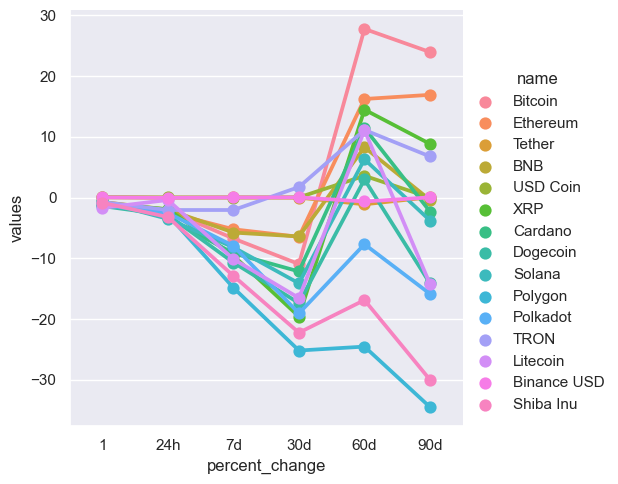

In [75]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [79]:
df10= df72[['name', 'quote.USD.price', 'timestamp']]
df10= df10.query("name== 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28166.15452,2023-05-10 16:01:36.606195
15,Bitcoin,28244.27081,2023-05-10 16:24:23.527522
30,Bitcoin,28256.24671,2023-05-10 16:25:24.025369
45,Bitcoin,28258.31904,2023-05-10 16:26:24.904460
60,Bitcoin,28258.31904,2023-05-10 16:27:25.776279
75,Bitcoin,28262.28029,2023-05-10 16:28:26.688875
90,Bitcoin,28279.13423,2023-05-10 16:29:27.492924
105,Bitcoin,28279.13423,2023-05-10 16:30:27.956608
120,Bitcoin,28299.15579,2023-05-10 16:31:28.769371
135,Bitcoin,28166.15452,2023-05-10 16:01:36.606195


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

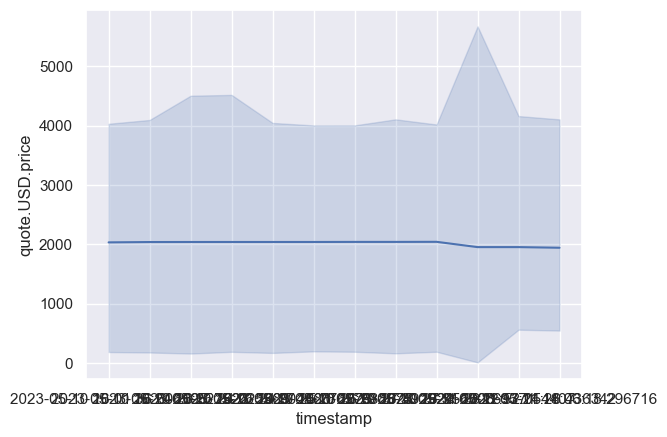

In [80]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df72)